In [99]:
# 4.1 planteamiento del problema  
# Punto 1
import sympy as sp
from sympy.physics.mechanics import *


vgs, g, w, alpha, crr, cdA, ro, vhw, lossdt = sp.symbols('v_gs g w alpha c_rr cdA ro vhw loss_dt')

# Definir la ecuación
ecuacion = (vgs * (((g * w * sp.sin(alpha)) + (g * w * sp.cos(alpha)) * crr) + (1/2 * cdA * ro * (vhw)**2)) + cdA * ro * vhw * vgs**2 + (1/2 * cdA * ro * vgs**3)) / (1 - (lossdt))
ecuacion

(0.5*cdA*ro*v_gs**3 + cdA*ro*v_gs**2*vhw + v_gs*(c_rr*g*w*cos(alpha) + 0.5*cdA*ro*vhw**2 + g*w*sin(alpha)))/(1 - loss_dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


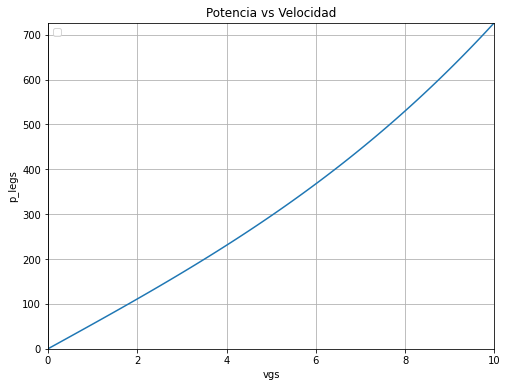

array([  0.        ,   5.48434305,  10.96975752,  16.45731485,
        21.94808647,  27.4431438 ,  32.94355828,  38.45040133,
        43.96474437,  49.48765885,  55.02021618,  60.5634878 ,
        66.11854513,  71.68645961,  77.26830265,  82.8651457 ,
        88.47806018,  94.10811751,  99.75638913, 105.42394646,
       111.11186093, 116.82120398, 122.55304703, 128.3084615 ,
       134.08851883, 139.89429045, 145.72684779, 151.58726226,
       157.47660531, 163.39594835, 169.34636283, 175.32892016,
       181.34469178, 187.39474911, 193.48016359, 199.60200663,
       205.76134968, 211.95926416, 218.19682149, 224.47509311,
       230.79515044, 237.15806491, 243.56490796, 250.01675101,
       256.51466548, 263.05972282, 269.65299443, 276.29555177,
       282.98846624, 289.73280929, 296.52965233, 303.38006681,
       310.28512414, 317.24589576, 324.26345309, 331.33886757,
       338.47321061, 345.66755366, 352.92296814, 360.24052547,
       367.62129709, 375.06635442, 382.57676889, 390.15

In [100]:
# Punto 2

import numpy as np
import matplotlib.pyplot as plt

vgs = np.linspace(start=0, stop=10, num=101)  # Cambiado el rango de vgs a valores positivos
g = 9.81 
w = 83.50
alpha = 6.2/100
crr = 5e-3
cdA = 0.35 
ro = 1 
vhw = 0  
lossdt = 2/100
distancia_cuchilla = 11.12 #kms

def ec1(vgs):
    return vgs * (((g * w * np.sin(alpha)) + (g * w * np.cos(alpha)) * crr) + (1/2 * cdA * ro * (vhw) ** 2)) + cdA * ro * vhw * vgs ** 2 + (1/2 * cdA * ro * vgs ** 3)/(1-(lossdt))

p_legs = ec1(vgs)


plt.figure(figsize=(8, 6))
plt.plot(vgs, p_legs)
plt.xlabel('vgs')
plt.ylabel('p_legs')
plt.title('Potencia vs Velocidad')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, max(p_legs))  
plt.show()

p_legs


<ipython-input-17-3446dc68d5db>:1: RuntimeWarning: divide by zero encountered in divide
  tiempo_cuchilla = distancia_cuchilla/vgs
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


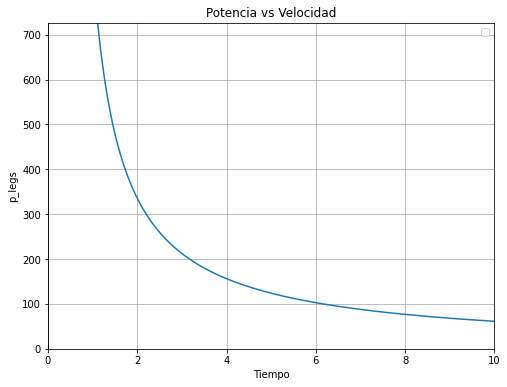

In [17]:
tiempo_cuchilla = distancia_cuchilla/vgs

plt.figure(figsize=(8, 6))
plt.plot(tiempo_cuchilla, p_legs)
plt.xlabel('Tiempo')
plt.ylabel('p_legs')
plt.title('Potencia vs Velocidad')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(0, 10)
plt.ylim(0, max(p_legs))  
plt.show()

In [124]:
# 4.2 Procesamiento de datos
# Punto 1 - Cadencia encima de 70 debajo de 90
import pandas as pd

archivo = 'data/data.CSV'
datos = pd.read_csv(archivo)

datos_filtrados = datos[(datos[' cadence [rpm]'] > 70) & (datos[' cadence [rpm]'] < 90)] #aplico el filtro
prom_cardiaca = datos_filtrados[' heartrate [bpm]'].mean() #promedio de la frecuencia

print("Datos filtrados:") #output
print(datos_filtrados)

print("La frecuencia cardíaca promedio en el set de datos filtrados es de", prom_cardiaca, 'bpm')



Datos filtrados:
      time [s]   distance [m]   watts [W]   heartrate [bpm]   cadence [rpm]  \
20        1969         7147.4         224               171              89   
21        1970         7152.8         255               170              85   
22        1971         7158.2         377               171              85   
35        1984         7227.5         263               176              89   
36        1985         7232.2         296               176              89   
...        ...            ...         ...               ...             ...   
2580      4543        16144.1         322               186              76   
2581      4544        16146.9         364               186              82   
2582      4545        16151.4         326               186              87   
2583      4546        16154.8         268               187              87   
2584      4547        16158.1         268               186              88   

       velocity_smooth [m/s]   alt

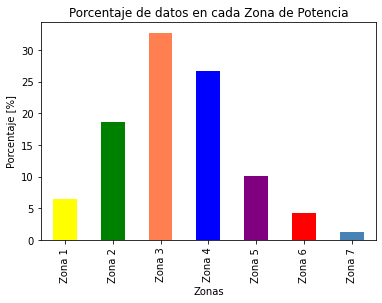

In [142]:
# Punto 2
# Definir los límites de las zonas de potencia
zonas = {
    'Zona 1': (0, 130),
    'Zona 2': (130, 178),
    'Zona 3': (178, 213),
    'Zona 4': (213, 249),
    'Zona 5': (249, 284),
    'Zona 6': (284, 356),
    'Zona 7': (356, 1500)
}

for zona, limites in zonas.items(): # Creo una columna en el df que me indica donde está cada dato
    datos[zona] = ((datos[' watts [W]'] >= limites[0]) & (datos[' watts [W]'] < limites[1])).astype(int)

porcentaje = datos[list(zonas.keys())].mean() * 100 # hallo el porcentaje de cada zona

fig, ax = plt.subplots() # creo un diagrama de barras
colores = ['yellow', 'green', 'coral', 'blue', 'purple', 'red', 'steelblue']

porcentaje.plot(kind='bar', ax=ax, color = colores)
ax.set_ylabel('Porcentaje [%]')
ax.set_xlabel('Zonas')
ax.set_title('Porcentaje de datos en cada Zona de Potencia')
plt.show()


Escogimos la gráfica de barra ya que esta permite presentar la distribución de datos de categorías distintas de una forma ordenada y clara, aunque simple y de fácil lectura para el usuario. 


In [143]:
# 4.3 Curva de potencia de un ciclista
# Punto 1 

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Extraer columnas de potencia y tiempo
potencia = datos['Potencia (W)']
tiempo = datos['Tiempo (min)']

# Realizar la interpolación utilizando interp1d
interpolador = interp1d(tiempo, potencia, kind='cubic')

# Generar un conjunto de puntos para la curva interpolada
tiempo_interpolado = np.linspace(tiempo.min(), tiempo.max(), 1000)
potencia_interpolada = interpolador(tiempo_interpolado)

# Graficar los datos y la curva interpolada
plt.plot(tiempo, potencia, 'o', label='Datos originales')
plt.plot(tiempo_interpolado, potencia_interpolada, '-', label='Interpolación cúbica')
plt.xlabel('Tiempo (min)')
plt.ylabel('Potencia (W)')
plt.title('Curva de Potencia del Ciclista')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'project/data/curva-potencia.csv'